In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import json
import pprint
import os
import nltk
import pandas as pd
import random
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
file_path = '/content/gdrive/MyDrive/data/pdf_parses/economics/pdf_parses_26.jsonl'

for line in open(file_path, 'r'):
  
  doc = json.loads(line)
  body_text = doc['body_text']

  if len(body_text) != 0:
    body_text = doc['body_text']
    text = ""
    for section in body_text:
      text += section["text"] 
    pprint.pprint(text)
    # print(text)
    break

In [ ]:
TOPIC = 'polisci'
METADATA_DIRECTORY = f'/content/gdrive/MyDrive/data/metadata/{TOPIC}'

classification_data = {"title": [], "abstract_sentence": [], "category": [], "sample_type": []}
titles = []

for file in os.listdir(METADATA_DIRECTORY):
  print(f'adding file {file}')
  metadata_path = METADATA_DIRECTORY + f'/{file}'  
  for i, line in enumerate(open(metadata_path, 'r')):
    doc = json.loads(line)
    title = doc['title'].lower()
    abstract = doc['abstract']
    if abstract == None:
      continue
    
    tokenizer = RegexpTokenizer(r'\w+')
    sentences = nltk.tokenize.sent_tokenize(abstract)
    sentences = [" ".join(tokenizer.tokenize(sentence.lower())) for sentence in sentences]
    sentences = [s + '\n' for s in sentences]

    split_len = len(sentences[0].split(" "))
    if split_len > 5 and split_len < 35:
      classification_data["title"].append(title)
      classification_data['abstract_sentence'].append(sentences[0])
      classification_data['category'].append(TOPIC)
      classification_data['sample_type'].append('1')

    # if len(sentences) > 2:
    #   if len(sentences[1].split(" ")) < 35:
    #     classification_data["title"].append(title)
    #     classification_data['abstract_sentence'].append(sentences[1])
    #     classification_data['category'].append(TOPIC)
    #     classification_data['sample_type'].append('1')

    #   ran = random.randrange(2, len(sentences))
    #   if len(sentences[ran].split(" ")) < 35:
    #     classification_data["title"].append(title)
    #     classification_data['abstract_sentence'].append(sentences[ran])
    #     classification_data['category'].append(TOPIC)
    #     classification_data['sample_type'].append('1')

      titles.append(title)

    if i > 15000:
      break

# get negative samples
for i in range(len(titles)):
  title = titles[i]
  sentence0 = random.choice(classification_data['abstract_sentence'])
  # sentence1 = random.choice(classification_data['abstract_sentence'])
  # sentence2 = random.choice(classification_data['abstract_sentence'])

  split_len = len(sentence0.split(" "))
  if split_len > 5 and split_len < 35:
    classification_data["title"].append(title)
    classification_data['abstract_sentence'].append(sentence0)
    classification_data['category'].append(TOPIC)
    classification_data['sample_type'].append('0')

  # classification_data["title"].append(title)
  # classification_data['abstract_sentence'].append(sentence1)
  # classification_data['category'].append(TOPIC)
  # classification_data['sample_type'].append('0')

  # classification_data["title"].append(title)
  # classification_data['abstract_sentence'].append(sentence2)
  # classification_data['category'].append(TOPIC)
  # classification_data['sample_type'].append('0')

df = pd.DataFrame(classification_data)
df.to_csv(f'/content/gdrive/MyDrive/data/eval_data/query_classification/{TOPIC}/{TOPIC}.tsv', sep = " ")

adding file metadata_0.jsonl
adding file metadata_1.jsonl
adding file metadata_10.jsonl
adding file metadata_11.jsonl
adding file metadata_12.jsonl
adding file metadata_13.jsonl
adding file metadata_14.jsonl
adding file metadata_15.jsonl
adding file metadata_16.jsonl
adding file metadata_17.jsonl
adding file metadata_18.jsonl
adding file metadata_19.jsonl
adding file metadata_2.jsonl
adding file metadata_20.jsonl
adding file metadata_21.jsonl
adding file metadata_22.jsonl
adding file metadata_23.jsonl
adding file metadata_24.jsonl
adding file metadata_25.jsonl
adding file metadata_26.jsonl
adding file metadata_27.jsonl
adding file metadata_28.jsonl
adding file metadata_29.jsonl
adding file metadata_3.jsonl
adding file metadata_30.jsonl
adding file metadata_31.jsonl
adding file metadata_32.jsonl
adding file metadata_33.jsonl
adding file metadata_34.jsonl
adding file metadata_35.jsonl


In [ ]:
df = pd.read_csv(f'/content/gdrive/MyDrive/data/eval_data/query_classification/{TOPIC}/{TOPIC}.tsv', sep=' ', index_col=0)

In [ ]:
df = df.dropna()
print(df.loc[0]['title'])
print(df.loc[0]['abstract_sentence'])

how to respond to climate change at the local level: a guideline for turkish cities
the overall aim of this project was threefold



In [ ]:
df.shape

(226870, 4)

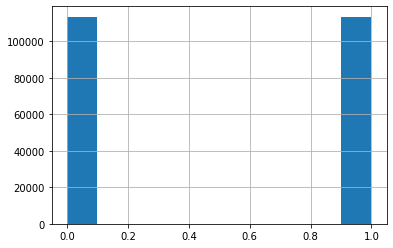

In [ ]:
df['sample_type'].hist()